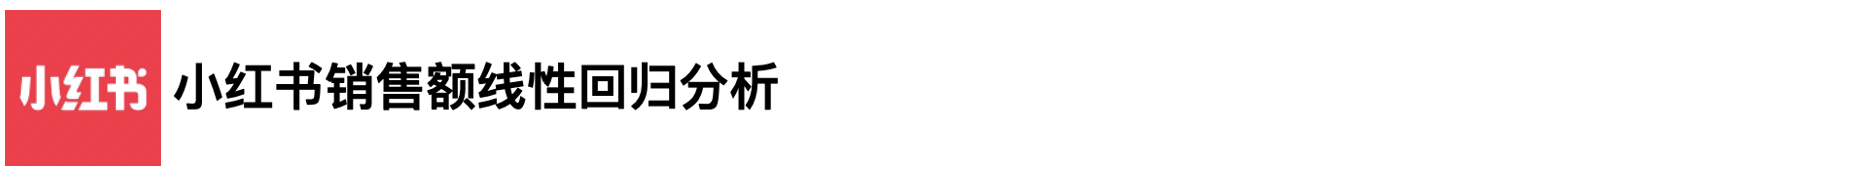

# 1 项目背景

小红书是目前非常热门的电商平台，和其他电商平台不同，小红书是从社区起家。在小红书社区，用户通过文字、图片、视频笔记的分享，记录了这个时代年轻人的正能量和美好生活。

小红书通过机器学习对海量信息和人进行精准、高效匹配，已累积海量的海外购物数据，分析出最受欢迎的商品及全球购物趋势，并在此基础上把全世界的好东西，以最短的路径、最简洁的方式提供给用户。

业务委托：协助小红书分析消费额的影响因子，并建立预测模型

# 2 业务问题与分析思路

业务问题的定义，采取What-Why-How的逻辑框架对业务问题进行递进式拆析，其中，What是问题的表象，Why是导致表象的深层原因，How是针对原因所提出的改善表象的对策建议。据此所定义的业务问题为：

What：如何对消费额进行预测？

Why：样本数据属性如何？这些属性因子如何影响消费额？如何基于已有数据属性建立消费额的预测模型？

思路：
1. 数据探索与预处理：数据清洗与探索环节，从整体把握数据，并刻画出小红书的主力消费群体画像
2. 影响因素分析：定量化用户各属性变量与消费额的相关关系，找出影响消费额的属性因子，为后续建立预测模型做准备
3. 预测模型建立：
    1. 模型选择：根据变量与消费额的关系，选择合适的模型
    2. 建模训练：由于要建立消费额的预测模型，需要将样本分为训练集和测试集，以验证模型的预测能力（同时可以防止模型出现过拟合现象）
    3. 模型评估与优化：
        1. 通过调整变量对模型进行优化
        2. 采用R²、RMSE、MAE等指标评估模型的拟合程度
        3. 用模型预测测试集数据，并评估模型预测能力

How：基于分析结果，如何从用户属性维度，提出提升消费额的业务建议？

# 3 结论与业务建议
提醒：结论与业务建议主要基于本次数据样本。

## 3.1 主要结论

1. 消费主力画像：与小红书的用户定位一致，年轻女性是主力消费群体，贡献了主要的消费额，且老用户的贡献度较高：
    1. 【性别】：女性数量占70%，贡献了69.02%消费额；男性用户人均消费额高于女性，在“他消费”逐渐崛起的时代，如果能进一步得到小红书男性消费的相关数据，挖掘“他们”在小红书的消费活动和偏好，或许能进一步扩大小红书用户群体；
    2. 【年龄】：16岁和23岁用户数占43.8%，贡献了43.19%消费额；人均消费能力在年龄变量上没有显示出明显规律，人均消费能力最强的群体为27岁，其次是18岁和21岁。
    3. 【用户周期】：
        1. 注册时间在2年内的用户是小红书的消费主力群体，用户数占68.59%，贡献了68.36%消费额，说明老用户的活跃程度较高；另外，注册时间在6个月内的用户人均消费能力较高；
        2. 此外，数据还显示，注册至今6个月的用户数<注册1年的用户数<注册2年的用户数，且注册2年的用户数约为注册1年用户数的3倍，说明在同样的时间段内新用户的增加速度减少，应引起注意。
        
        
2. 用户消费行为：
    1. 【活动参与】：最近30天未参与app活动的人数约92.69%，贡献了89.15%消费额，但近30天参与过app活动的群体，人均消费能力（567）显著高于未参与过活动的群体（367），建议展开提高用户参与app活动的方案。
    2. 【下单时间】： 从总消费额来看，整体呈现下单距今时间越久，本次消费额的越小的变化趋势；人均消费额则相反，大致呈现下单距今时间越久，人均消费越高的趋势。
    3. 【以往消费金额】：从总消费额来看，整体呈现过往消费金额越高，本次消费额越小的变化趋势；从人均角度来看，大致呈现过往消费金额越高，本次人均消费额越高的趋势。
    4. 【第三方平台购物行为】：从总消费额来看，基本呈现在第三方平台购物次数越高，在本次购物的消费额越低的趋势；从人均角度来看，未呈现明显规律，其中未在第三方平台购物群体的人均消费额高于其他群体。说明提高用户忠诚度可以提高消费额。


3. 模型评估：
    1. 【变量选择】：相关分析结果显示，自变量与revenue的相关系数非常小，严格来说应该被看做不相关（也不能进行后续的线性回归，实际工作中，应该寻找其他变量展开线性回归工作），但本项目主要练习回归分析，因此将选取相关系数绝对值前三的变量(previous_order_amount、engaged_last_30、days_since_last_order)进一步建模。
    2. 【回归模型】：revenue=166.2473+0.0675previous_order_amount+117.4401engaged_last_30+8.6917*days_since_last_order：
        1. 从模型中可得到，当过往消费额为0、过去30天未参与app活动、当天下单，即一个新用户的下单金额约为166元；
        2. 当用户过往消费金额越高时，此次消费额也会越高，且可以定量为每增加1元，本次下单的消费额就会增加0.0675元；
        3. 过去30天参与过app活动群体的消费额比未参与过app活动的群体更高，且可以定量为高117元；
        4. 距上一次消费的时间越久下单的消费额会越高，且可以定量为每增加一天，消费额将增加约8.69元。
    3. 【模型拟合程度评估】：
         1.	虽然三个自变量的系数在回归模型中均呈现统计学显著性，但是从前面的相关分析结果可知，三个自变量与revenue呈非常弱的正相关关系；
         2. 根据调整后的R²（=0.044）可知，自变量对因变量的解释程度为4.4%，模型的解释力度较低。
    4. 【模型预测能力评估】：
          1. 原模型(y_train_predict & y_train)的RMSE和MAE分别为787和355，预测值(y_test_predict & y_test)的RMSE和MAE分别为1235和347，虽然MAE稍微下降，但是RMASE(主要评估指标)却显著上升，说明模型的预测能力一般(一般如果模型的拟合解释程度较低，其预测能力也不可靠)。

## 3.2 业务建议

1. 拉新促活、增加用户平台粘性：
    1. 从分析中发现用户新增速度在减少的问题，可能是用户拉新达到瓶颈，尤其是女性群体。鉴于平台现有男性用户数量较少且男性用户人均消费高于女性，平台可以考虑依据男性用户在小红书的消费活动和偏好，发掘并建立平台的“他经济”；
    2. 结果显示，参加过app活动、以往消费金额较高、在三方平台购买次数较少，即小红书平台粘性较高的用户，人均消费额会越高。鉴于平台目前参加app活动的人数较少（7%），可以考虑策划开展更多有意思的app活动，吸引用户参与和消费、提高用户粘性；另外也可以根据用户的下单时间（下单距今时间越久，人均消费越高的趋势）发放不同优惠程度的优惠券，吸引用户消费。


2. 关于建立预测模型：
    1. 从分析结果来看，现有变量与目标变量呈现非常弱的相关性，模型的拟合与解释程度较低，说明现有变量对目标变量的预测能力较差，建议收集新的变量建模；
    2. 可以考虑以下变量（理论上比现有变量跟能预测用户的消费额，但是收集难度与方案需要进一步确定）：
        1. 用户属性变量：职业职位、收入
        2. 消费行为变量：消费频率、消费均价、消费产品偏好

# 4 数据分析与建模

## 4.1 数据清洗、探索与预处理

In [1]:
# 调包
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

# 导入数据
rb = pd.read_csv('hw2_Redbook.csv')
# 将' days_since_last_order'前面的空格去掉，方便调用(操作这一步时已经观察了数据属性)
rb.columns = rb.columns.map(lambda x: x.strip())
# 查看数据属性，检查缺失值
print('数据属性信息：')
print(rb.info())
# 检查异常值
rb.describe()

数据属性信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                  29452 non-null float64
gender                   17723 non-null float64
age                      1247 non-null float64
engaged_last_30          17723 non-null float64
lifecycle                29452 non-null object
days_since_last_order    29452 non-null float64
previous_order_amount    29452 non-null float64
3rd_party_stores         29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB
None


,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,1247.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,0.298200,26.234964,0.073069,7.711348,2339.254020,2.286059
std,959.755615,0.457481,7.103802,0.260257,6.489289,2361.572921,3.538219
min,0.020000,0.000000,16.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,0.000000,23.000000,0.000000,2.190000,773.349500,0.000000
50%,175.980000,0.000000,26.000000,0.000000,5.970000,1655.790000,0.000000
75%,498.772500,1.000000,32.000000,0.000000,11.740000,3084.796500,3.000000
max,103466.100000,1.000000,37.000000,1.000000,23.710000,11597.900000,10.000000


##### 小结：
1. 共8个变量(7个自变量，1个目标变量)，其中gender、age、engaged_last_30三个变量存在缺失值，age缺失值较多，无异常值
2. 目标变量：revenue:'用户消费金额'
3. 用户属性变量：
    1. gender:'性别(1是男性，0是女性)',
    2. age:'年龄',
    3. lifecycle:'生命周期(A-注册后6个月内，B-注册后1年内，C-注册后2年内)'
4. 用户行为属性变量：
    1. engaged_last_30:'最近30天在app上参与重要活动', 
    2. days_since_last_order:'最近一次下单距今天天数（小于1代表当天下单）',
    3. previous_order_amount:'用户以往累计购买金额',
    4. 3rd_party_stores:'用户过往在第三方app购买的数量（0代表只在自营产品中购买）'

## 4.2 消费者属性变量对消费额的影响

该部分通过分析不同消费者群体的消费额差异，以刻画出小红书的主力消费群体用户画像

### 4.2.1 性别对消费额的影响

性别比例：
0.0    0.7018
1.0    0.2982
Name: gender, dtype: float64


Text(0, 0.5, 'per_revenue')

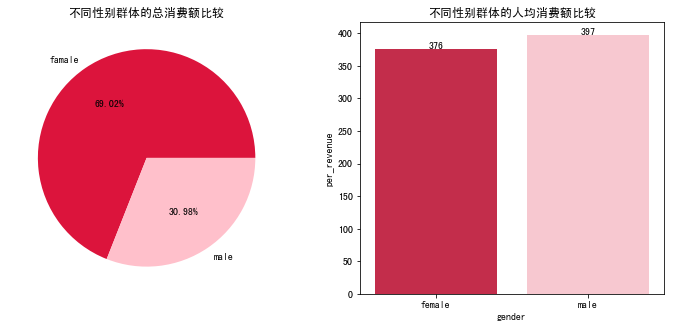

In [15]:
# 性别比例
print('性别比例：\n',rb.gender.value_counts(1), sep='')

# 不同性别群体的总消费额比较
data = rb.groupby(['gender'])['revenue'].sum()
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.pie(data,autopct = '%0.2f%%' , labels = ['famale','male'], colors=('crimson', 'pink'))
plt.title('不同性别群体的总消费额比较')

#不同性别群体的人均消费额比较
data = rb.groupby(['gender'])[['revenue']].mean()
data = data.reset_index()
data['gender'] = ['female', 'male']
plt.subplot(122)
fig = sns.barplot(x='gender',y='revenue', data=data, palette=('crimson', 'pink'))
for index, row in data.iterrows():
    fig.text(row.name, row.revenue, int(row.revenue), color='black', ha='center')
plt.title('不同性别群体的人均消费额比较')
plt.ylabel('per_revenue')

##### 小结：
1. 女性是小红书的消费主力群体，用户数量占70%，贡献了69.02%消费额，这与小红书的用户性别定位一致；
2. 但从人均消费额角度来看，男性的人均消费额高于女性，男性用户的消费潜力不容忽视。

### 4.2.2 年龄对消费额的影响

年龄比例：
 {23.0: '23.34%', 16.0: '20.53%', 36.0: '9.22%', 37.0: '8.74%', 31.0: '5.69%', 32.0: '5.05%', 33.0: '4.89%', 28.0: '4.41%', 30.0: '4.25%', 29.0: '4.01%', 26.0: '2.25%', 25.0: '1.84%', 27.0: '1.76%', 19.0: '1.12%', 21.0: '0.80%', 22.0: '0.80%', 24.0: '0.64%', 20.0: '0.56%', 18.0: '0.08%'}


Text(0.5, 1.0, '不同年龄群体的人均消费额比较')

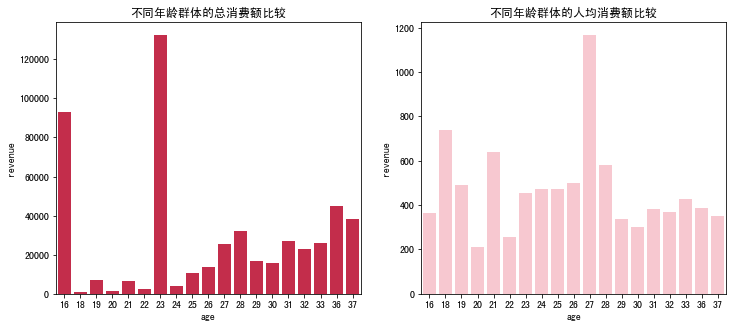

In [6]:
# 年龄比例
a = dict(rb.age.value_counts(1))
for i in a.keys():
    a[i] = "%.2f%%"%(a[i] * 100)
print('年龄比例：\n',a)

# 不同年龄群体的总消费额比较
data = rb.groupby(['age'])[['revenue']].sum().reset_index()
data['age'] = data['age'].astype(int)
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x = 'age', y = 'revenue', data = data, color='crimson')
plt.title('不同年龄群体的总消费额比较')

# 不同年龄群体的人均消费额比较
data = rb.groupby(['age'])[['revenue']].mean().reset_index()
data['age'] = data['age'].astype(int)
plt.subplot(122)
sns.barplot(x = 'age', y = 'revenue', data = data, color = 'pink')
plt.title('不同年龄群体的人均消费额比较')

##### 小结：
1. 从样本来看，16岁和23岁是小红书的消费主力群体，用户数占43.8%，贡献了43.19%消费额
2. 从人均消费额角度来看，27岁群体的人均消费能力较高

### 4.2.3 生命周期对消费额的影响

计数：
C    0.685896
B    0.193841
A    0.120263
Name: lifecycle, dtype: float64


Text(0.5, 1.0, '不同lifecycle群体的人均消费额比较')

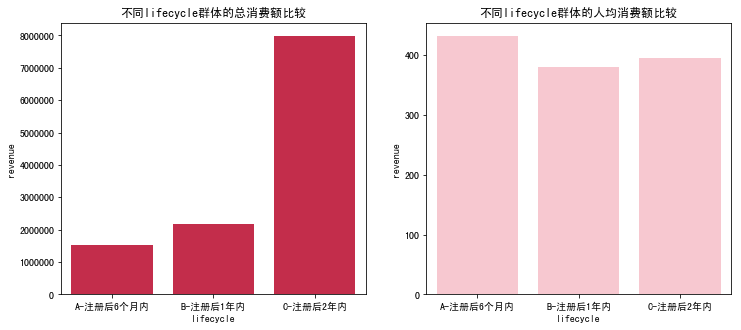

In [7]:
# 查看lifecycle字段
print('计数：')
print(rb.lifecycle.value_counts(1))

# 不同lifecycle群体的总消费额比较
data = rb.groupby(['lifecycle'])[['revenue']].sum().reset_index()
data['lifecycle'] = ['A-注册后6个月内','B-注册后1年内','C-注册后2年内']
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x = 'lifecycle', y = 'revenue', data = data, color = 'crimson')
plt.title('不同lifecycle群体的总消费额比较')

# 不同lifecycle群体的人均消费额比较
data = rb.groupby(['lifecycle'])[['revenue']].mean().reset_index()
data['lifecycle'] = ['A-注册后6个月内','B-注册后1年内','C-注册后2年内']
plt.subplot(122)
sns.barplot(x = 'lifecycle', y = 'revenue', data = data, color='pink')
plt.title('不同lifecycle群体的人均消费额比较')

##### 小结
1. 从样本来看，注册时间在2年内的用户是小红书的消费主力群体，用户数占68.59%，贡献了68.36%消费额，说明老用户的活跃程度较高
2. 从人均消费额角度来看，注册时间在6个月内的用户人均消费能力较高
3. 从用户周期来看，注册时间在2年内的用户数量约为注册时间在1年内的3倍，说明在同样的时间内（1年）新用户的增加量是减少的，需引起注意

## 4.3 消费者行为属性对消费额的影响
该部分通过分析不同消费行为群体的消费额差异，以刻画出小红书的主力消费群体的消费行为习惯

### 4.3.1 最近30天是否参加活动的行为对总消费额的影响

计数：
0.0    0.926931
1.0    0.073069
Name: engaged_last_30, dtype: float64


Text(0.5, 1.0, '最近30天参与app活动与未参与群体的人均消费额比较')

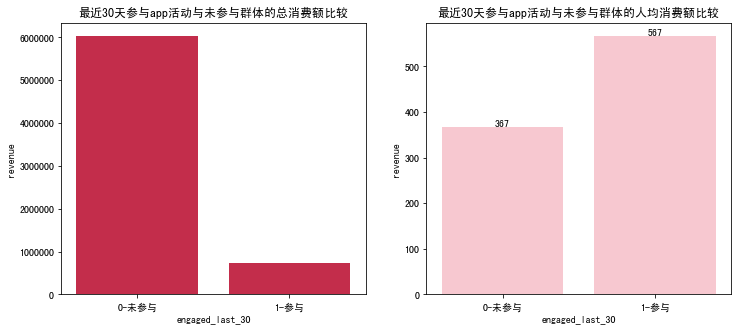

In [8]:
# 查看engaged_last_30字段
print('计数：\n', rb.engaged_last_30.value_counts(1), sep='')

# 最近30天参与app活动与未参与群体的总消费额比较
data = rb.groupby(['engaged_last_30'])[['revenue']].sum().reset_index()
data['engaged_last_30'] = data['engaged_last_30'].astype(int)
data['engaged_last_30'] = ['0-未参与','1-参与']
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x = 'engaged_last_30', y = 'revenue', data = data, color = 'crimson')
plt.title('最近30天参与app活动与未参与群体的总消费额比较')

# 最近30天参与app活动与未参与群体的人均消费额比较
data = rb.groupby(['engaged_last_30'])[['revenue']].mean().reset_index()
data['engaged_last_30'] = data['engaged_last_30'].astype(int)
data['engaged_last_30'] = ['0-未参与','1-参与']
plt.subplot(122)
fig = sns.barplot(x = 'engaged_last_30', y = 'revenue', data = data, color='pink')
for index, row in data.iterrows():
    fig.text(row.name, row.revenue, int(row.revenue), color = 'black', ha='center')
plt.title('最近30天参与app活动与未参与群体的人均消费额比较')

##### 小结
1. 从样本来看，最近30天未参与app活动的群体占本次消费样本的92.69%，贡献了89.15%消费额
2. 从人均角度来看，近30天参与过app活动的群体，人均消费能力（567）显著高于未参与过活动的群体（367）

### 4.3.2 最近一次下单距今时间对消费额的影响

days_since_last_order比例：
 {0: '14.51%', 1: '9.26%', 2: '8.23%', 3: '6.80%', 4: '6.03%', 5: '5.40%', 11: '4.66%', 6: '4.66%', 7: '4.33%', 10: '4.18%', 8: '4.09%', 9: '3.87%', 12: '3.00%', 13: '2.62%', 14: '2.39%', 16: '2.06%', 15: '2.02%', 17: '1.87%', 23: '1.80%', 19: '1.74%', 18: '1.72%', 22: '1.65%', 20: '1.60%', 21: '1.53%'}


Text(0.5, 1.0, '最近一次下单距今时间不同群体的人均消费额比较')

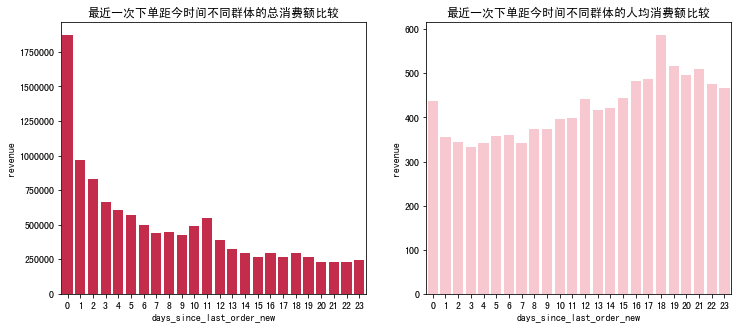

In [16]:
# 构造数据
data = rb.copy()
bins = range(0,25,1)
labels = range(0,24,1)
data['days_since_last_order_new'] = pd.cut(data['days_since_last_order'], bins, labels=labels) 

# days_since_last_order比例
a = dict(data.days_since_last_order_new.value_counts(1))
for i in a.keys():
    a[i] = "%.2f%%"%(a[i] * 100)
print('days_since_last_order比例：\n',a)

# 最近一次下单距今时间不同群体的总消费额比较
plt.figure(figsize=(12,5))
data1=data.groupby(['days_since_last_order_new'])[['revenue']].sum().reset_index()
plt.subplot(121)
sns.barplot(x='days_since_last_order_new', y='revenue', data=data1, color = 'crimson')
plt.title('最近一次下单距今时间不同群体的总消费额比较')

# 最近一次下单距今时间不同群体的人均消费额比较
plt.subplot(122)
data2=data.groupby(['days_since_last_order_new'])[['revenue']].mean().reset_index()
sns.barplot(x='days_since_last_order_new', y='revenue', data=data2, color = 'pink')
plt.title('最近一次下单距今时间不同群体的人均消费额比较')

##### 小结
1. 从总消费额来看，整体呈现下单距今时间越久，本次消费额的越小的变化趋势；其中当天下单的群体数量最大(14.51%)，贡献的消费额最高(15.99%)；
2. 从人均角度来看，大致呈现下单距今时间越久，人均消费越高的趋势

### 4.3.3 过往消费金额对此次消费额的影响

days_since_last_order比例：
 {1000: '32.23%', 2000: '25.53%', 3000: '16.22%', 4000: '9.60%', 5000: '5.49%', 6000: '3.40%', 12000: '2.23%', 7000: '2.08%', 8000: '1.36%', 9000: '0.87%', 10000: '0.60%', 11000: '0.40%'}


Text(0.5, 1.0, '过往消费金额不同群体的最近一次人均消费额比较')

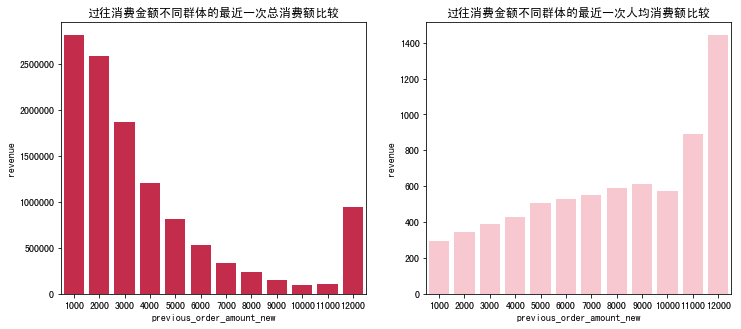

In [17]:
# 构造数据
data = rb.copy()
bins = range(0,13000,1000)
labels = range(1000,13000,1000)
data['previous_order_amount_new'] = pd.cut(data['previous_order_amount'], bins = bins, right = False, labels = labels)

# days_since_last_order比例
a = dict(data.previous_order_amount_new.value_counts(1))
for i in a.keys():
    a[i] = "%.2f%%"%(a[i] * 100)
print('days_since_last_order比例：\n',a)

# 过往消费金额不同群体的最近一次总消费额比较
data1 = data.groupby(['previous_order_amount_new'])['revenue'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='previous_order_amount_new', y= 'revenue', data=data1, color = 'crimson')
plt.title('过往消费金额不同群体的最近一次总消费额比较')

# 过往消费金额不同群体的最近一次人均消费额比较
data2 = data.groupby(['previous_order_amount_new'])['revenue'].mean().reset_index()
plt.subplot(122)
sns.barplot(x='previous_order_amount_new', y= 'revenue', data=data2, color='pink')
plt.title('过往消费金额不同群体的最近一次人均消费额比较')

##### 小结：
1. 从总消费额来看，整体呈现过往消费金额越高，本次消费额越小的变化趋势；其中过往消费金额为1000-3000的群体数量最大(73.98%)，贡献的消费额最高(62.09%)；
2. 从人均角度来看，大致呈现过往消费金额越高，本次人均消费额越高的趋势

### 4.3.4 在第三方平台购物行为对消费额的影响

在第三方平台购物次数比例：
0     0.550421
10    0.143861
1     0.100706
2     0.063901
3     0.049063
4     0.034463
5     0.033376
6     0.010661
7     0.007300
8     0.004278
9     0.001969
Name: 3rd_party_stores, dtype: float64


Text(0.5, 1.0, '在第三方平台购物不同次数群体的人均消费额比较')

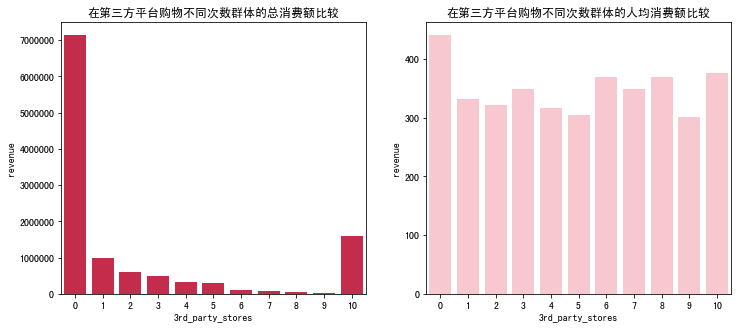

In [18]:
# 在第三方平台购物次数比例
print('在第三方平台购物次数比例：\n',rb['3rd_party_stores'].value_counts(1), sep='')

# 在第三方平台购物不同次数群体的总消费额比较
data=rb.groupby(['3rd_party_stores'])['revenue'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='3rd_party_stores', y='revenue', data=data, color='crimson')
plt.title('在第三方平台购物不同次数群体的总消费额比较')

# 在第三方平台购物不同次数群体的人均消费额比较
data=rb.groupby(['3rd_party_stores'])['revenue'].mean().reset_index()
plt.subplot(122)
sns.barplot(x='3rd_party_stores', y='revenue', data=data, color='pink')
plt.title('在第三方平台购物不同次数群体的人均消费额比较')

##### 小结：
1. 从样本来看，未在第三方平台购物的群体占本次消费样本的55.04%，贡献了61.04%消费额；此外，在第三方平台购物次数较高（10次）的群体样本数与消费额贡献次之，分别为14.38%和13.59%
2. 从人均角度来看，未呈现明显规律，其中未在第三方平台购物群体的人均消费额高于其他群体

## 4.4 各变量与目标变量revenue相关关系
该部分主要为后面建模所选择变量做基础。

一般变量选择的方法有两种：
1. 第一种为通过相关分析，将相关关系较强的变量选入回归模型
2. 另一种为将所有变量纳入模型，通过回归系数的显著性，将p值大于显著性阈值（一般为0.05）的变量移出模型，直到剩下的变量回归系数均达显著。

本项目采取第一种方法，通过进行相关分析选择回归变量

### 4.4.1 相关关系定量化

In [27]:
# 哑变量处理
rb2 = rb.copy()
rb2 = pd.get_dummies(rb2)
rb2.head()

# 变量间的相关关系
rb2.corr()[['revenue']].sort_values('revenue', ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.168186
engaged_last_30,0.080031
days_since_last_order,0.036754
gender,0.014944
lifecycle_A,0.013688
lifecycle_C,-0.002042
age,-0.008323
lifecycle_B,-0.008866
3rd_party_stores,-0.026102


### 4.4.2 相关关系可视化

Text(0.5, 1.0, '3rd_party_stores与revenue的关系')

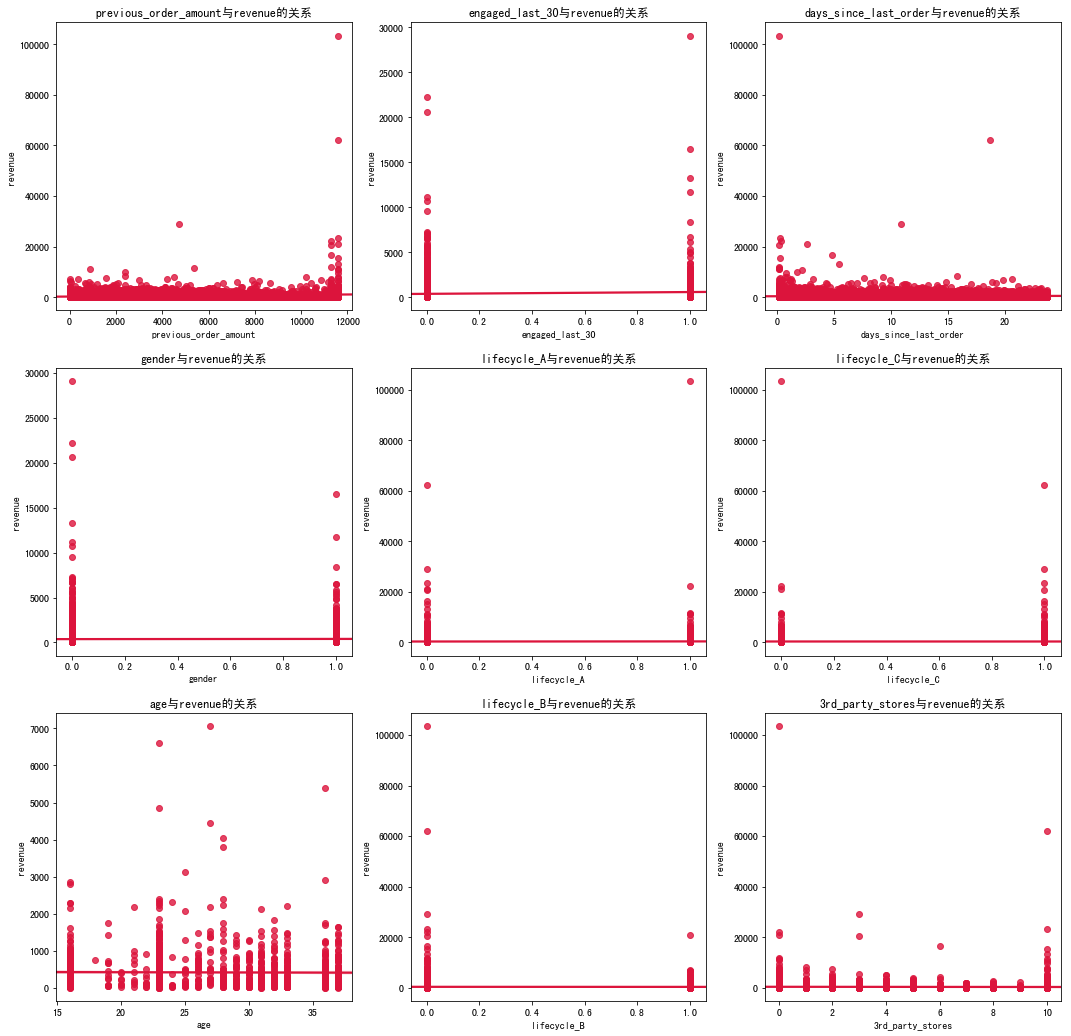

In [21]:
# 相关关系可视化
plt.figure(figsize=(18,18))

# previous_order_amount与revenue的相关关系
plt.subplot(331)
sns.regplot(x='previous_order_amount', y='revenue', data=rb2, color = 'crimson')
plt.title('previous_order_amount与revenue的关系')

# previous_order_amount与revenue的相关关系
plt.subplot(332)
sns.regplot(x='engaged_last_30', y='revenue', data=rb2, color = 'crimson')
plt.title('engaged_last_30与revenue的关系')

# days_since_last_order与revenue的相关关系
plt.subplot(333)
sns.regplot(x='days_since_last_order', y='revenue', data=rb2, color = 'crimson')
plt.title('days_since_last_order与revenue的关系')

# gender与revenue的相关关系
plt.subplot(334)
sns.regplot(x='gender', y='revenue', data=rb2, color = 'crimson')
plt.title('gender与revenue的关系')

# lifecycle_A与revenue的相关关系
plt.subplot(335)
sns.regplot(x='lifecycle_A', y='revenue', data=rb2, color = 'crimson')
plt.title('lifecycle_A与revenue的关系')

# lifecycle_C与revenue的相关关系
plt.subplot(336)
sns.regplot(x='lifecycle_C', y='revenue', data=rb2, color = 'crimson')
plt.title('lifecycle_C与revenue的关系')

# age与revenue的相关关系
plt.subplot(337)
sns.regplot(x='age', y='revenue', data=rb2, color = 'crimson')
plt.title('age与revenue的关系')

# lifecycle_B与revenue的相关关系
plt.subplot(338)
sns.regplot(x='lifecycle_B', y='revenue', data=rb2, color = 'crimson')
plt.title('lifecycle_B与revenue的关系')

# 3rd_party_stores与revenue的相关关系
plt.subplot(339)
sns.regplot(x='3rd_party_stores', y='revenue', data=rb2, color = 'crimson')
plt.title('3rd_party_stores与revenue的关系')

##### 小结：
1. 一般认为，|r|≥0.8 高度相关；0.5≤|r|<0.8 中度相关；0.3≤|r|<0.5 低度相关；|r|<0.3 关系极弱，认为不相关。由图及相关关系表可知，自变量与revenue的相关系数非常小，严格来说应该被看做不相关（也不能进行后续的线性回归，实际工作中，应该寻找其他变量展开线性回归工作）。
2. 但是，本项目主要目的是练习回归分析，因此将选取相关系数绝对值前三的变量(previous_order_amount、engaged_last_30、days_since_last_order)进一步展开线性回归分析。

## 4.5 回归建模

### 4.5.1 回归数据处理与准备
主要分为3步：
1. 由前面的数据探索分析可得，engaged_last_30存在缺失值，这里选择采用均值填充的方法
2. 然后构建自变量与因变量，分别保存在x和y中
3. 由于需要建立预测模型，因此将数据分割为训练集和测试集

In [37]:
# 对engaged_last_30采取均值填充
rb2['engaged_last_30'] = rb2['engaged_last_30'].fillna(rb2['engaged_last_30'].mean())

# 构建自变量和因变量，分别保存在x和y中
rb3 = rb2[['revenue','previous_order_amount','engaged_last_30','days_since_last_order']]
x = rb3.iloc[:,1:4]
y = rb3.iloc[:,0]

# 分割训练接和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
print('length of train_datasets:',len(y_train))
print('length of test_datasets:',len(y_test))

length of train_datasets: 20616
length of test_datasets: 8836


### 4.5.2 建模、模型拟合评估、模型预测能力评估
1. 模型选择：选择线性回归模型建模训练
2. 模型拟合评估指标：可决系数R²、均方根误差RMSE、绝对平均误差MAE
3. 模型预测能力评估方法：用训练后的模型对测试集自变量x_test进行预测，将预测值y_test_pre与真实值y_test比较

In [233]:
# 调包、模型实例化
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 训练模型
model.fit(x_train, y_train)

# 输出截距和自变量系数
a, b = model.intercept_, model.coef_
print('截距与系数')
print('intercept:',a)
print('coefficients:',b, end='\n\n')

# 模型拟合评估
y_train_pre = model.predict(x_train)
score = model.score(x_train, y_train)
error = y_train_pre - y_train
rmse = ((error**2).mean())**0.5
mae = abs(error).mean()
print('模型拟合程度评估')
print('R²:',score)
print('RMSE:',rmse)
print('MAE:',mae, end='\n\n')

# 模型预测能力评估
y_test_pre = model.predict(x_test.values)
error = y_test_pre - y_test
rmse = ((error**2).mean())**0.5
mae = abs(error).mean()
print('模型预测能力评估')
print('RMSE_test:',rmse)
print('MAE_test:',mae, end='\n\n')

# 输出模型摘要表
from statsmodels.formula.api import ols
rb3_train = pd.concat([x_train, y_train], axis=1)
rb3_test = pd.concat([x_test, y_test], axis=1)
model = ols('y_train~x_train',rb3_train).fit()
print('模型摘要表')
print(model.summary())

截距与系数
intercept: 166.24727248543383
coefficients: [6.75276897e-02 1.17440108e+02 8.69168771e+00]

模型拟合程度评估
R²: 0.044278485529093636
RMSE: 787.4785730433716
MAE: 355.25267354644313

模型预测能力评估
RMSE_test: 1235.9651817626677
MAE_test: 347.8633452103151

模型摘要表
                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     318.3
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          4.76e-202
Time:                        13:51:23   Log-Likelihood:            -1.6674e+05
No. Observations:               20616   AIC:                         3.335e+05
Df Residuals:                   20612   BIC:                         3.335e+05
Df Model:                           3                                         
Covariance Type:            nonrob

##### 小结：
1. 回归模型：revenue=166.2473+0.0675*previous_order_amount+117.4401*engaged_last_30+8.6917*days_since_last_order：
    1. 从模型中可得到，当过往消费额为0、过去30天未参与app活动、当天下单，即一个新用户的下单金额约为166元；
    2. 当用户过往消费金额越高时，此次消费额也会越高，且可以定量为每增加1元，本次下单的消费额就会增加0.0675元；
    3. 过去30天参与过app活动群体的消费额比未参与过app活动的群体更高，且可以定量为高117元；
    4. 距上一次消费的时间越久下单的消费额会越高，且可以定量为每增加一天，消费额将增加约8.69元
2. 模型拟合程度评估：
    1. 虽然三个自变量的系数在回归模型中均呈现统计学显著性，但是从前面的相关分析结果可知，三个自变量与revenue呈非常弱的正相关关系；
    2. 根据调整后的R²（=0.044）可知，自变量对因变量的解释程度为4.4%，模型的解释力度较低
3. 模型预测能力评估：
    1. 原模型(y_train_predict & y_train)的RMSE和MAE分别为787和355，预测值(y_test_predict & y_test)的RMSE和MAE分别为1235和347，虽然MAE稍微下降，但是RMASE（主要评估指标）却显著上升，说明模型的预测能力一般（一般如果模型的拟合解释程度较低，其预测能力也不可靠）